*All imports.*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Using pandas to get the data.

In [ ]:
import pandas as pd

data_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
)
col_names = [
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class",
]
df = pd.read_csv(data_url, names=col_names, header=None)

Randomly balancing the data.

In [ ]:
g = df.groupby("class")
balanced_df = pd.DataFrame(
    g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
)

Splitting data into 70% training and 30% testing.

In [ ]:
from sklearn.model_selection import train_test_split

X = balanced_df[col_names[: len(col_names) - 1]]
y = balanced_df["class"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=1
)  # 70% training and 30% test, stratify to stay balanced

Splitting data into 70% training and 30% testing. (With feature scaling)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

X = balanced_df[col_names[: len(col_names) - 1]]
y = balanced_df["class"]
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(
    Xs, y, stratify=y, test_size=0.3, random_state=1
)  # 70% training and 30% test, stratify to stay balanced

**Decision Tree.**

              precision    recall  f1-score   support

           h       0.78      0.78      0.78      2007
           g       0.78      0.78      0.78      2006

    accuracy                           0.78      4013
   macro avg       0.78      0.78      0.78      4013
weighted avg       0.78      0.78      0.78      4013



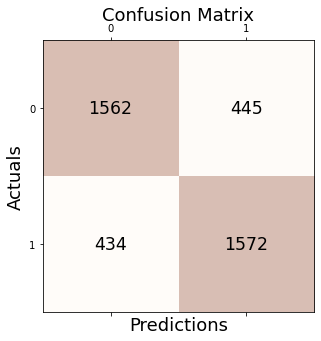

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt


clf = DecisionTreeClassifier()  # Create Decision Tree classifer object
clf = clf.fit(X_train, y_train)  # Train Decision Tree Classifer

y_pred = clf.predict(X_test)  # Prediction for test data

print(metrics.classification_report(y_test, y_pred, labels=['h','g']))

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred, labels = ['h','g']) # h is negative, g is positive

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**AdaBoost.**

Perform grid search (step = 10) with cross validation (10 splits).

Best params: {'n_estimators': 81}
Best cross-validation score: 0.826445899351449


(0.7, 0.85)

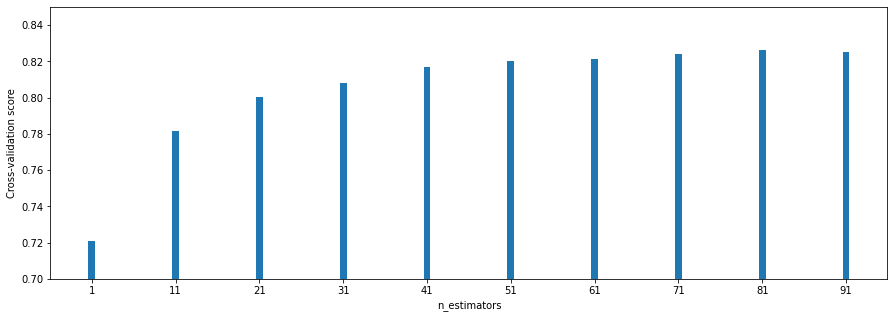

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ab = AdaBoostClassifier()

# Perform grid search with cross-validation
param_grid = {"n_estimators": range(1, 100, 10)}
gscv = GridSearchCV(ab, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_estimators"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_estimators"])
ax.set_xlabel("n_estimators")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

Perform another grid search (step = 10) with cross validation (10 splits). From 101 to 151.

Best params: {'n_estimators': 131}
Best cross-validation score: 0.8300775798374518


(0.7, 0.85)

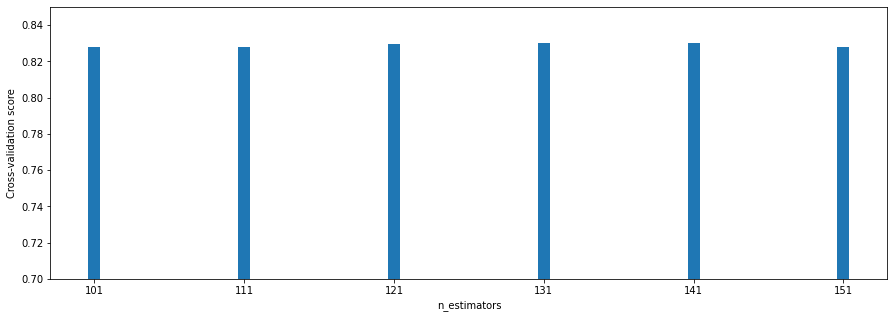

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ab = AdaBoostClassifier()

# Perform grid search with cross-validation
param_grid = {"n_estimators": range(101, 152, 10)}
gscv = GridSearchCV(ab, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_estimators"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_estimators"])
ax.set_xlabel("n_estimators")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

Fine grid search (step = 1) with cross validation (10 splits). From 125 to 135, since previous grid searches showed highest peak around 131.

Best params: {'n_estimators': 132}
Best cross-validation score: 0.8306115398297894


(0.7, 0.85)

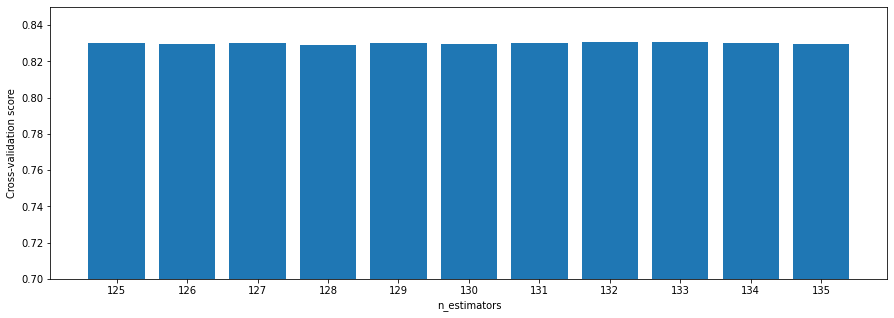

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ab = AdaBoostClassifier()

# Perform grid search with cross-validation
param_grid = {"n_estimators": range(125, 136, 1)}
gscv = GridSearchCV(ab, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_estimators"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_estimators"])
ax.set_xlabel("n_estimators")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

AdaBoost using n_estimators = 132 as it's the best found.

              precision    recall  f1-score   support

           h       0.82      0.81      0.82      2007
           g       0.81      0.82      0.82      2006

    accuracy                           0.82      4013
   macro avg       0.82      0.82      0.82      4013
weighted avg       0.82      0.82      0.82      4013



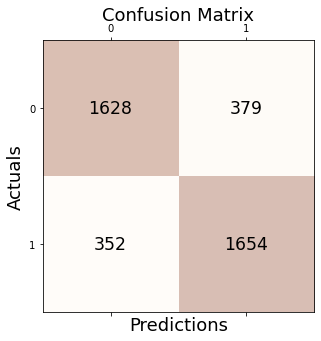

In [ ]:
ab = AdaBoostClassifier(n_estimators=122)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)

print(metrics.classification_report(y_test, y_pred, labels=['h','g']))

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred, labels = ['h','g']) # h is negative, g is positive

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**K-Nearest Neighbours (K-NN).**

Perform grid search (step = 10) with cross validation (10 splits).

Best params: {'n_neighbors': 21}
Best cross-validation score: 0.7720818624633994


(0.7, 0.85)

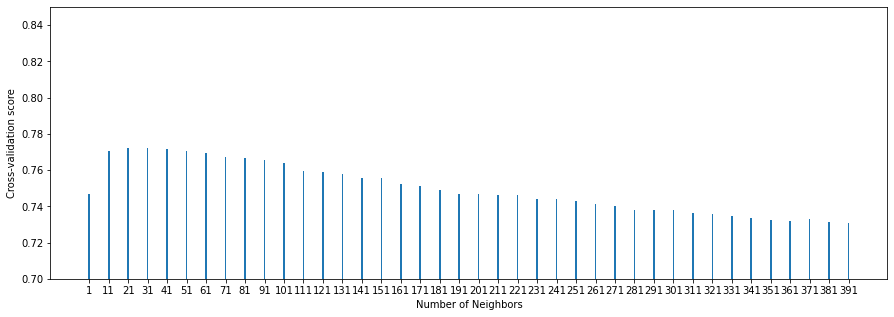

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Perform grid search with cross-validation
param_grid = {"n_neighbors": range(1, 400, 10)}
gscv = GridSearchCV(knn, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_neighbors"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_neighbors"])
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

Fine grid search (step = 1) with cross validation (10 splits). From 1 to 40, since previous grid search showed peak around 21.

Best params: {'n_neighbors': 17}
Best cross-validation score: 0.7745383292741884


(0.7, 0.85)

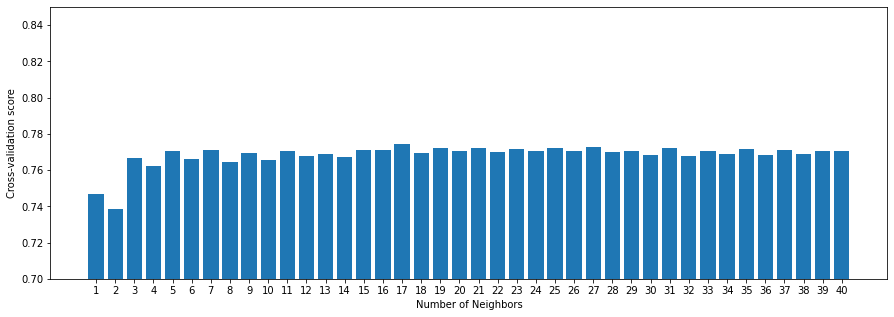

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Perform grid search with cross-validation
param_grid = {"n_neighbors": range(1, 41, 1)}
gscv = GridSearchCV(knn, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_neighbors"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_neighbors"])
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

KNN using k = 17 as it's the best found.

              precision    recall  f1-score   support

           h       0.84      0.65      0.73      2007
           g       0.71      0.88      0.79      2006

    accuracy                           0.76      4013
   macro avg       0.78      0.76      0.76      4013
weighted avg       0.78      0.76      0.76      4013



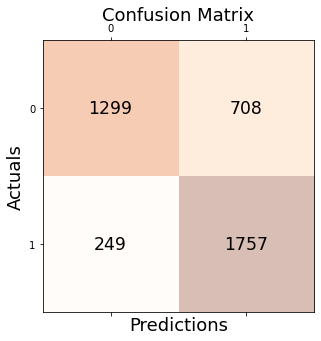

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.classification_report(y_test, y_pred, labels=['h','g']))

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred, labels = ['h','g']) # h is negative, g is positive

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**K-Nearest Neighbours (K-NN).** *(using scaled features)*

Perform grid search (step = 10) with cross validation (10 splits).

Best params: {'n_neighbors': 31}
Best cross-validation score: 0.8105310866650248


(0.7, 0.85)

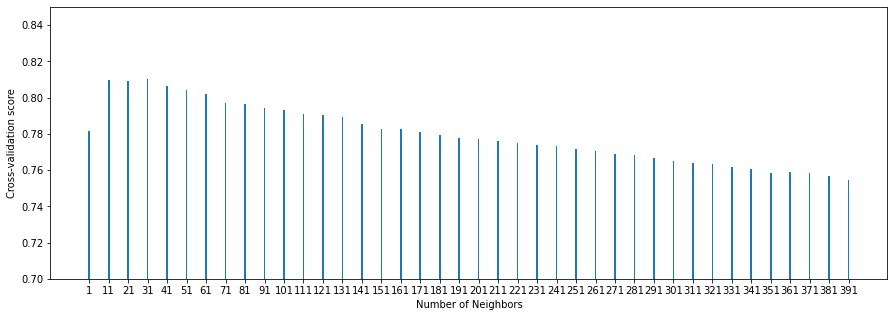

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knns = KNeighborsClassifier()

# Perform grid search with cross-validation
param_grid = {"n_neighbors": range(1, 400, 10)}
gscv = GridSearchCV(knns, param_grid, cv=10)  # 10 splits
gscv.fit(Xs_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_neighbors"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_neighbors"])
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

Fine grid search (step = 1) with cross validation (10 splits). From 1 to 50, since previous grid search showed peak around 31.

Best params: {'n_neighbors': 17}
Best cross-validation score: 0.811383393080298


(0.7, 0.85)

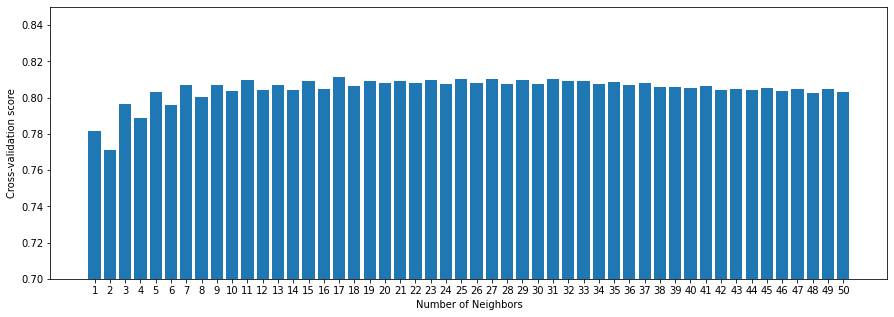

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knns = KNeighborsClassifier()

# Perform grid search with cross-validation
param_grid = {"n_neighbors": range(1, 51, 1)}
gscv = GridSearchCV(knns, param_grid, cv=10)  # 10 splits
gscv.fit(Xs_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_neighbors"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_neighbors"])
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

KNN using k = 17 as it's the best found.

              precision    recall  f1-score   support

           h       0.88      0.74      0.80      2007
           g       0.77      0.90      0.83      2006

    accuracy                           0.82      4013
   macro avg       0.83      0.82      0.82      4013
weighted avg       0.83      0.82      0.82      4013



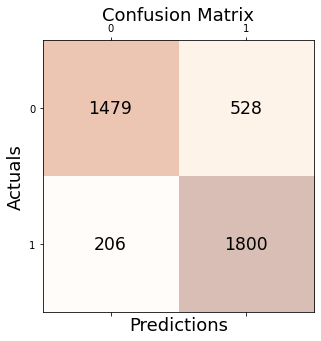

In [ ]:
knns = KNeighborsClassifier(n_neighbors=17)
knns.fit(Xs_train, y_train)
y_pred = knns.predict(Xs_test)

print(metrics.classification_report(y_test, y_pred, labels=['h','g']))

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred, labels = ['h','g']) # h is negative, g is positive

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Random Forests.**

Perform grid search (step = 10) with cross validation (10 splits).

Best params: {'n_estimators': 281}
Best cross-validation score: 0.8621159775241953


(0.75, 0.9)

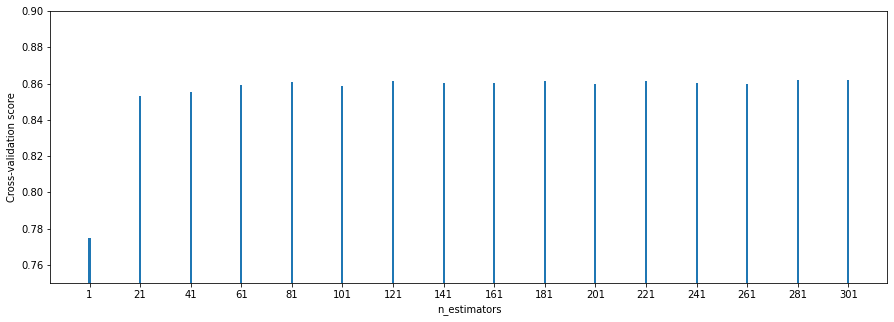

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

# Perform grid search with cross-validation
param_grid = {"n_estimators": range(1, 302, 20)}
gscv = GridSearchCV(rf, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_estimators"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_estimators"])
ax.set_xlabel("n_estimators")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.75, 0.9))

In [ ]:
print(gscv.cv_results_["mean_test_score"])

[0.77464528 0.85303786 0.85549444 0.85944652 0.86072777 0.85880481
 0.8614745  0.86008686 0.86030088 0.86147529 0.8598741  0.86115535
 0.8604068  0.85998002 0.86211598 0.86179649]


Fine grid search (step = 1) with cross validation (10 splits). From 115 to 125, since previous grid search showed 121 had one of the highest scores at a reasonable complexity.

Best params: {'n_estimators': 124}
Best cross-validation score: 0.8613685703600324


(0.75, 0.9)

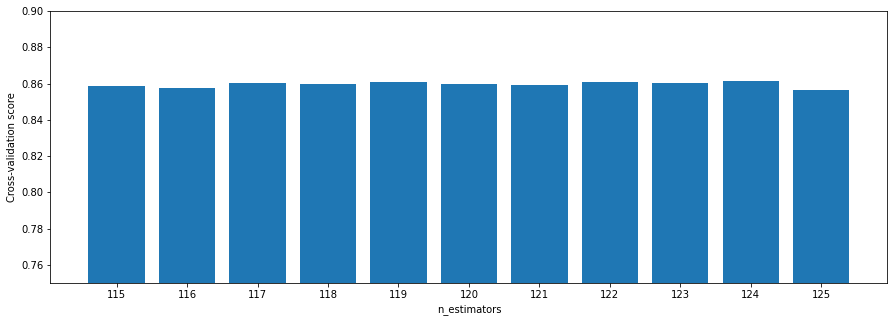

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

# Perform grid search with cross-validation
param_grid = {"n_estimators": range(115, 126, 1)}
gscv = GridSearchCV(rf, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_estimators"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_estimators"])
ax.set_xlabel("n_estimators")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.75, 0.9))

Random Forests using n_estimators = 124 as it's the best found.

              precision    recall  f1-score   support

           h       0.88      0.83      0.85      2007
           g       0.84      0.89      0.86      2006

    accuracy                           0.86      4013
   macro avg       0.86      0.86      0.86      4013
weighted avg       0.86      0.86      0.86      4013



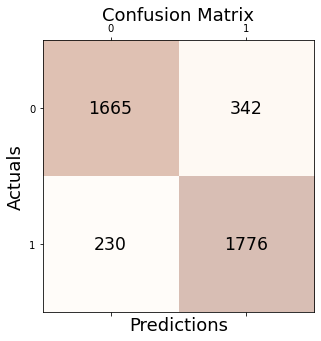

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=124)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(metrics.classification_report(y_test, y_pred, labels=['h','g']))

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred, labels = ['h','g']) # h is negative, g is positive

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Naive Bayes.** *(Gaussian)*

              precision    recall  f1-score   support

           h       0.79      0.40      0.53      2007
           g       0.60      0.90      0.72      2006

    accuracy                           0.65      4013
   macro avg       0.69      0.65      0.62      4013
weighted avg       0.69      0.65      0.62      4013



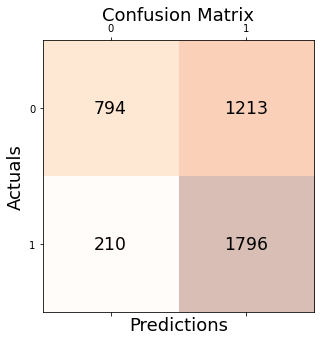

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(metrics.classification_report(y_test, y_pred, labels=['h','g']))

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred, labels = ['h','g']) # h is negative, g is positive

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()